# Analyse des données

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### 1. Nettoyage des données

In [186]:
df = pd.read_csv('data/kc_house_data.csv')
# Montre toutes les colonnes et leurs types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [187]:
# Montre les 10 premières lignes du dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [188]:
#  describe() permet de voir les statistiques descriptives des colonnes numériques
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [189]:
# données manquantes par colonne
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [190]:
# traitement des doublons 
df.duplicated().sum()

0

In [191]:
# rename de la colonne sqft_living en surface
df.rename(columns={'sqft_living': 'surface'}, inplace=True)
df

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 2. Exploration des données

In [192]:
# correration entre le prix et la surface
df[['price', 'surface']].corr()

,price,surface
price,1.000000,0.702035
surface,0.702035,1.000000


Corrélation entre la surface et le prix

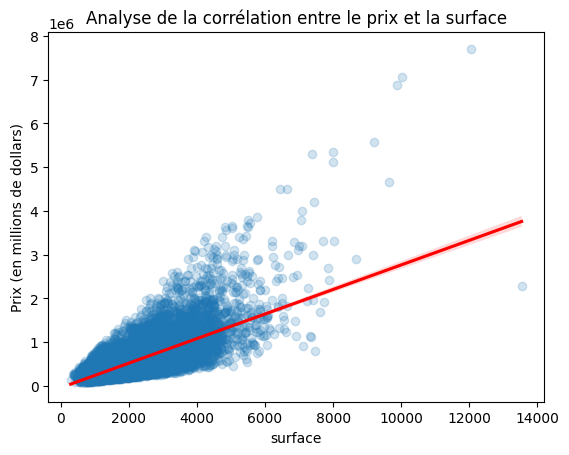

In [193]:
sns.regplot(x='surface', y='price', data=df, scatter_kws={'alpha': 0.2} , line_kws={'color': 'red'})
plt.title('Analyse de la corrélation entre le prix et la surface')
# price en en milion de dollars
plt.ylabel('Prix (en millions de dollars)')
plt.show()

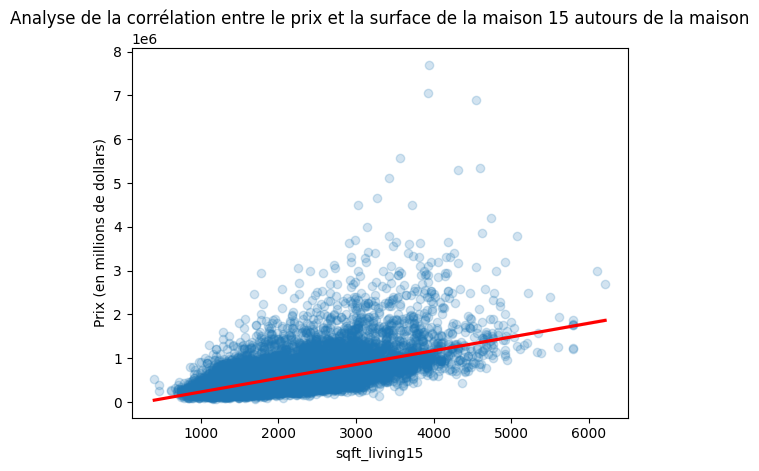

In [194]:
# correlation entre le prix et la surface de la maison 15 autours de la maison
df[['price', 'sqft_living15']].corr()
# graphique 
sns.regplot(x='sqft_living15', y='price', data=df, scatter_kws={'alpha': 0.2} , line_kws={'color': 'red'})
plt.title('Analyse de la corrélation entre le prix et la surface de la maison 15 autours de la maison')
# price en en milion de dollars
plt.ylabel('Prix (en millions de dollars)')
plt.show()


 prix des maisons en fonction du zipcode




/tmp/ipykernel_14944/194046112.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prix_zipcode = df.groupby('zipcode').mean()['price'].sort_values(ascending=False)


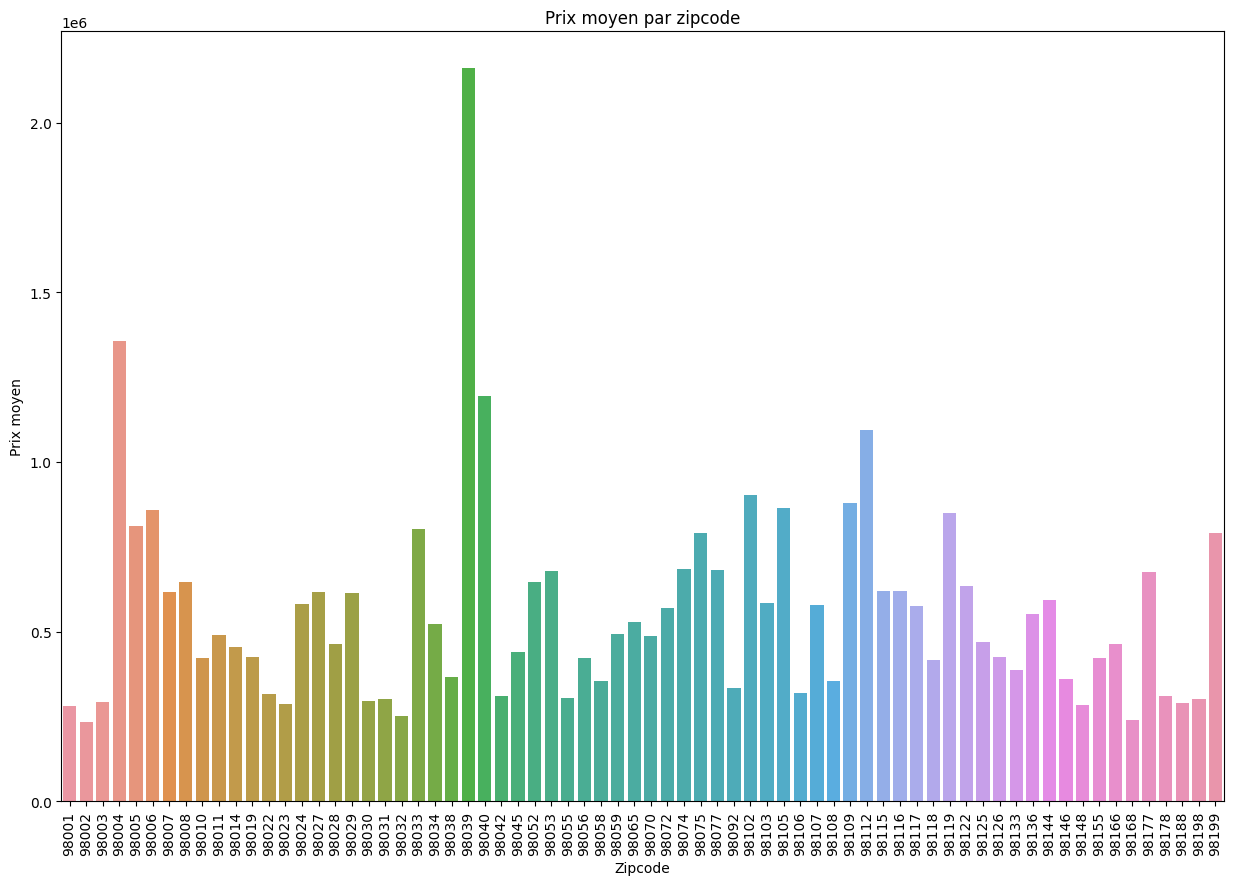

In [195]:
prix_zipcode = df.groupby('zipcode').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=prix_zipcode.index, y=prix_zipcode.values)
plt.title('Prix moyen par zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Prix moyen')  
plt.xticks(rotation=90)
plt.show()

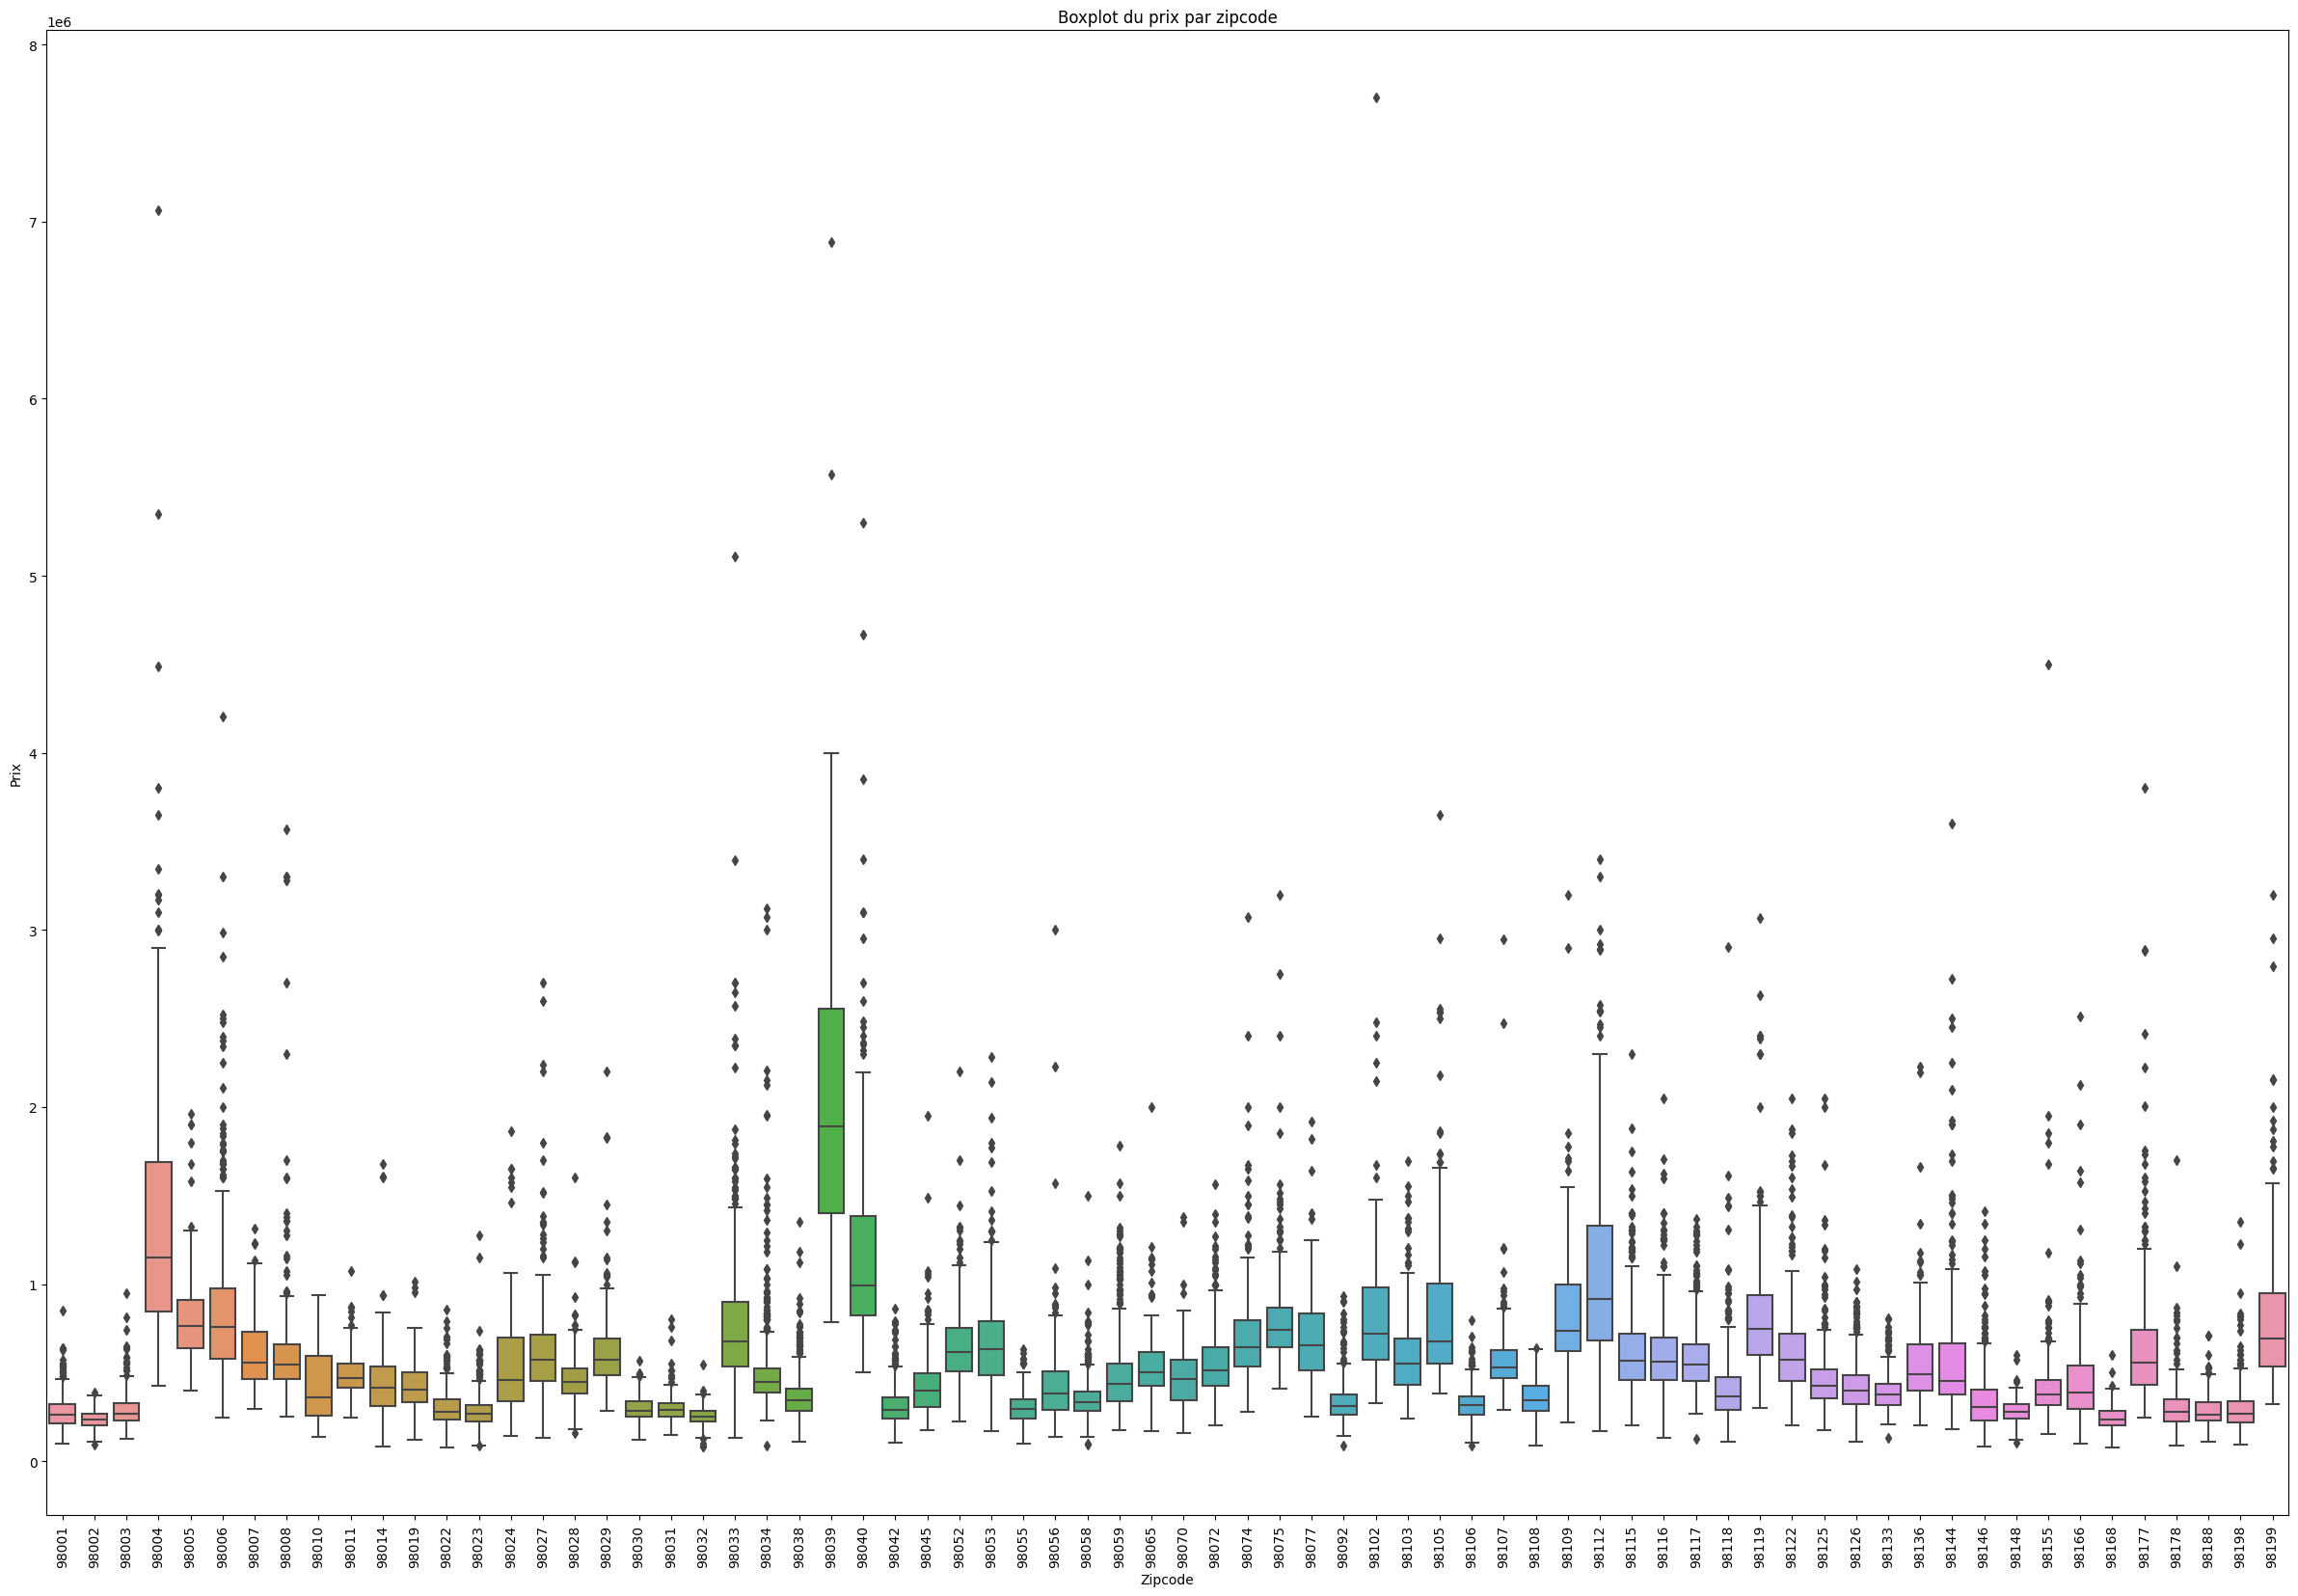

In [196]:
plt.figure(figsize=(30, 20))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('Boxplot du prix par zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Prix')
plt.xticks(rotation=90)
plt.show()

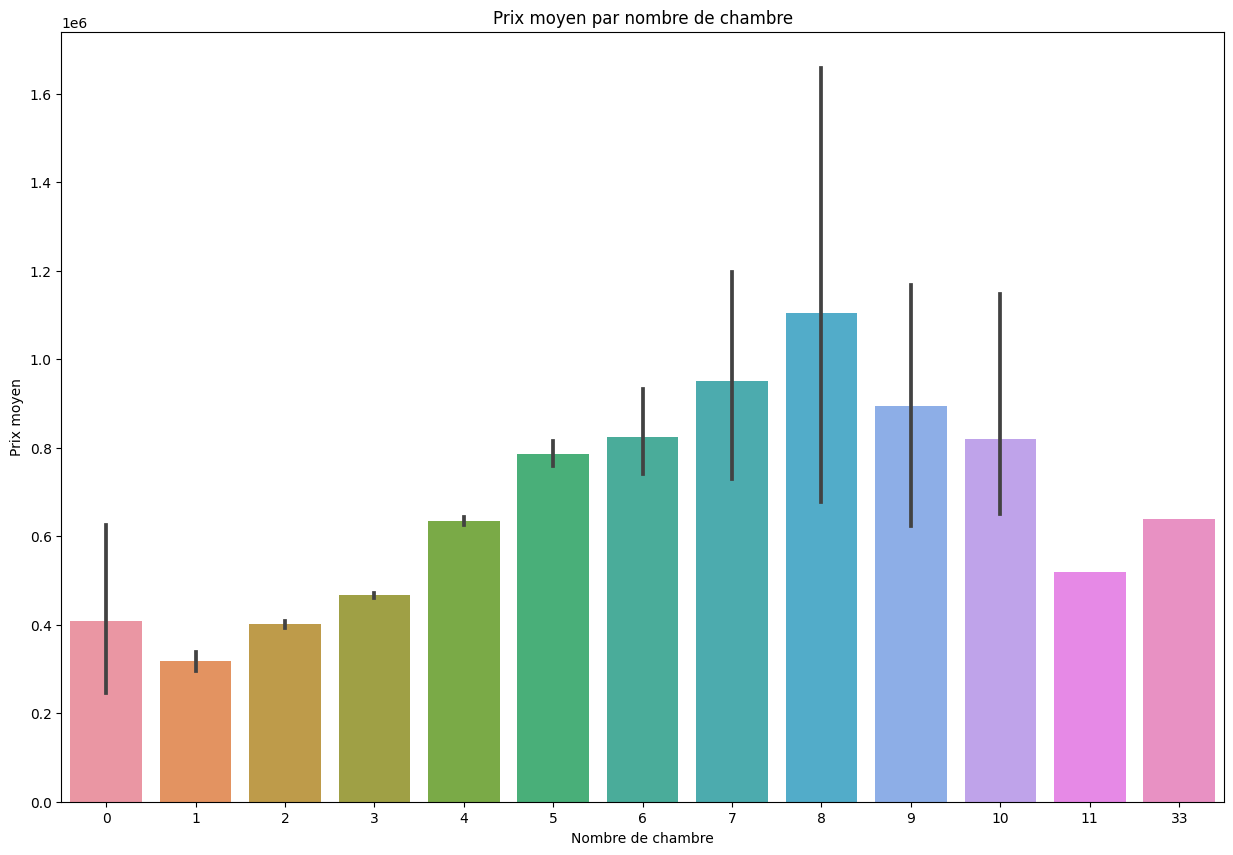

In [197]:
# graphique nombre de chambre et prix
plt.figure(figsize=(15, 10))
# bar plot prix et chambre
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Prix moyen par nombre de chambre')
plt.xlabel('Nombre de chambre')
plt.ylabel('Prix moyen')
plt.show()



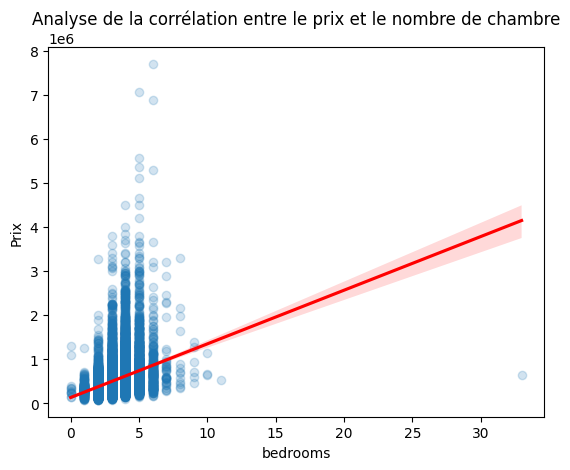

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [198]:
# correlation entre le prix et le nombre de chambre
df[['price', 'bedrooms']].corr()
# graphique 
sns.regplot(x='bedrooms', y='price', data=df, scatter_kws={'alpha': 0.2} , line_kws={'color': 'red'})
plt.title('Analyse de la corrélation entre le prix et le nombre de chambre')
plt.ylabel('Prix')
plt.show()
# chambre 33
df[df['bedrooms'] == 33]

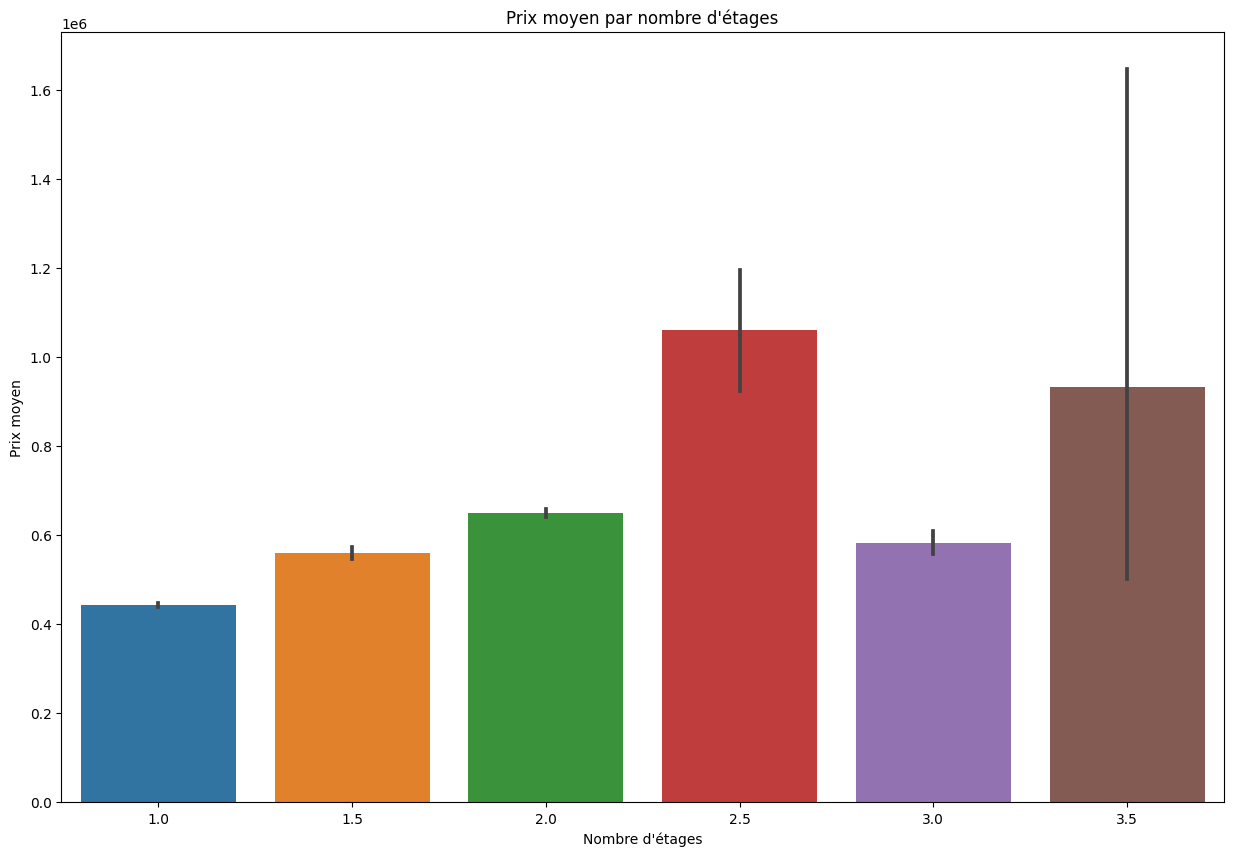

In [199]:
# barplot pour le prix par le nombre de floors
plt.figure(figsize=(15, 10))
sns.barplot(x='floors', y='price', data=df)
plt.title('Prix moyen par nombre d\'étages')
plt.xlabel('Nombre d\'étages')
plt.ylabel('Prix moyen')
plt.show()


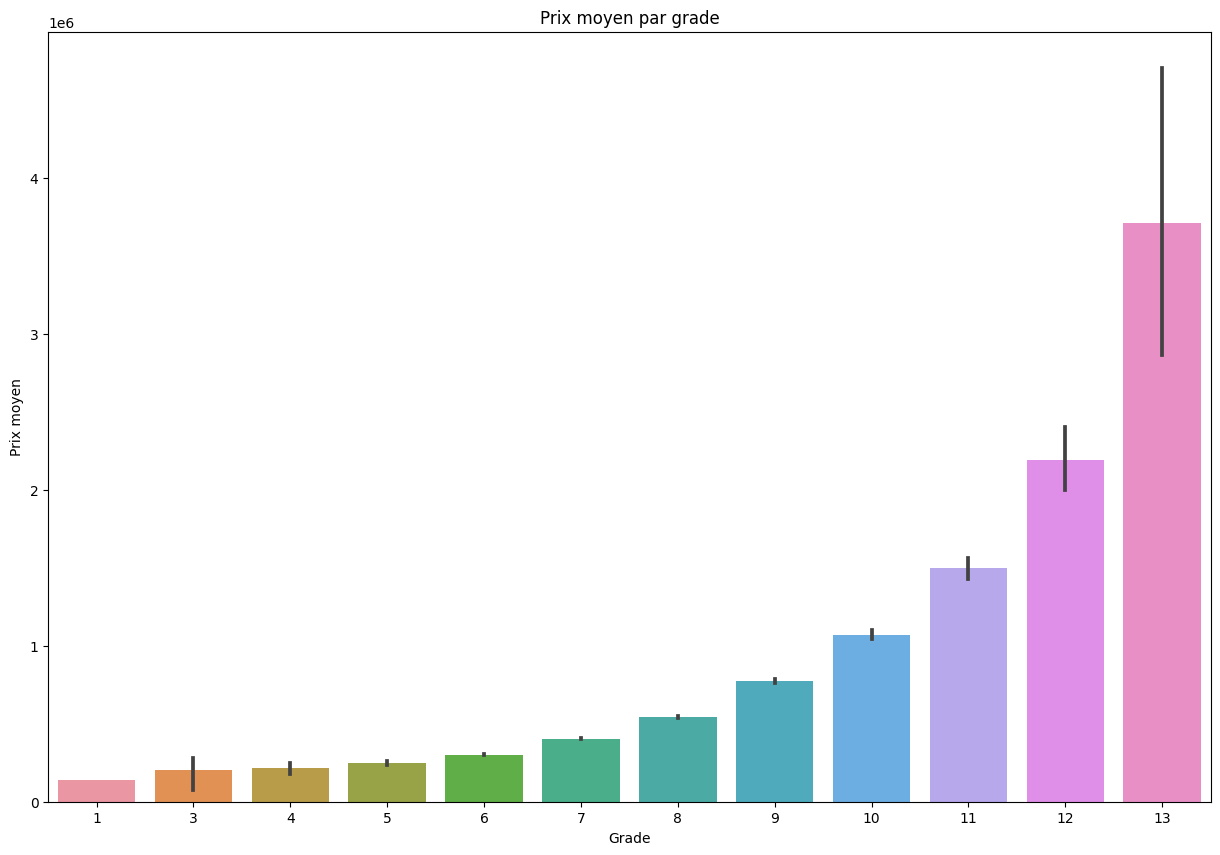

In [200]:
# barplot pour le prix par le grade
plt.figure(figsize=(15, 10))
sns.barplot(x='grade', y='price', data=df)
plt.title('Prix moyen par grade')
plt.xlabel('Grade')
plt.ylabel('Prix moyen')
plt.show()

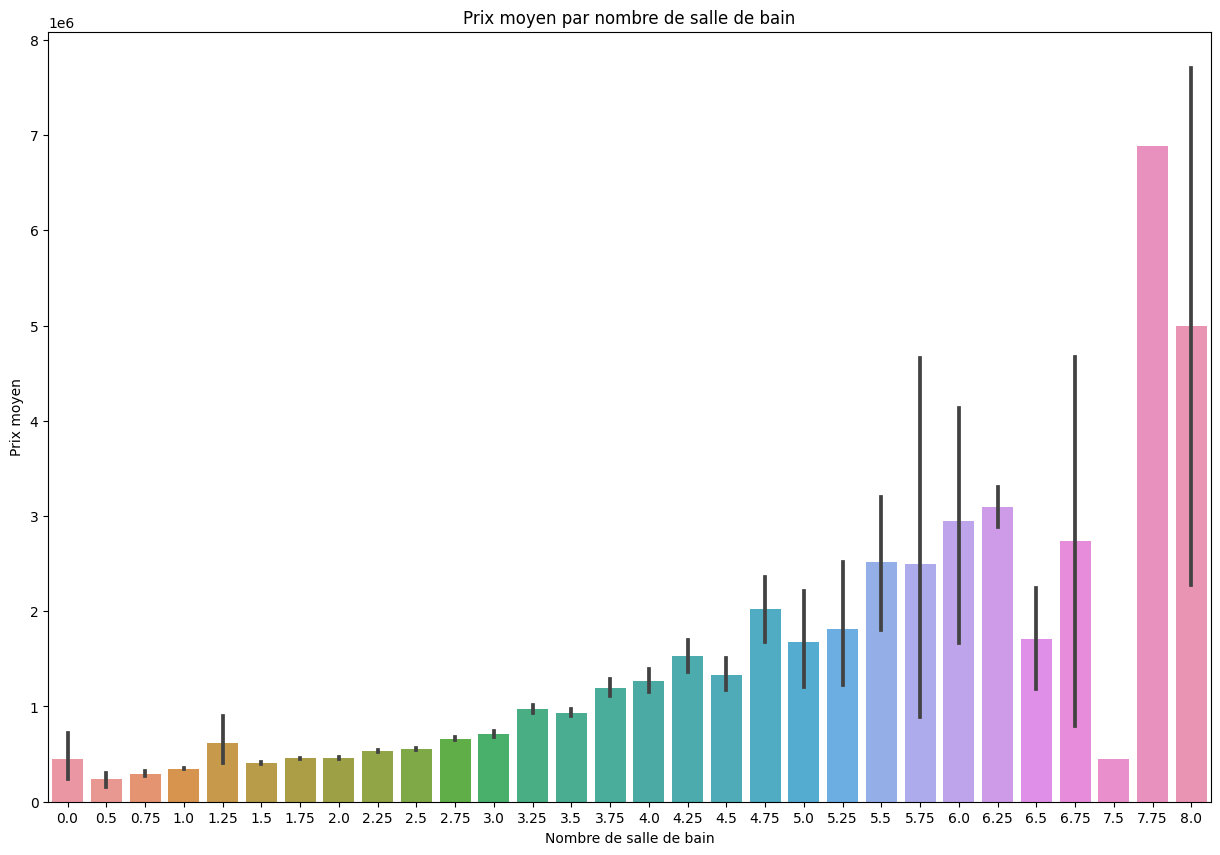

In [201]:
# barplot pour le prix par les bathrooms
plt.figure(figsize=(15, 10))
sns.barplot(x='bathrooms', y='price', data=df)
plt.title('Prix moyen par nombre de salle de bain')
plt.xlabel('Nombre de salle de bain')
plt.ylabel('Prix moyen')
plt.show()

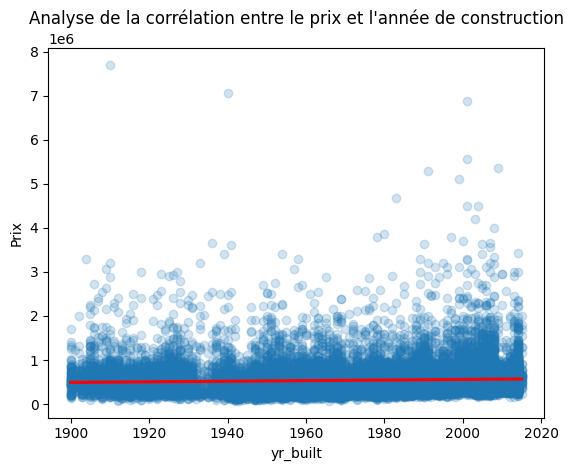

In [202]:
# correlation entre le prix et l'année de construction
df[['price', 'yr_built']].corr()
# graphique
sns.regplot(x='yr_built', y='price', data=df, scatter_kws={'alpha': 0.2} , line_kws={'color': 'red'})
plt.title('Analyse de la corrélation entre le prix et l\'année de construction')
plt.ylabel('Prix')
plt.show()

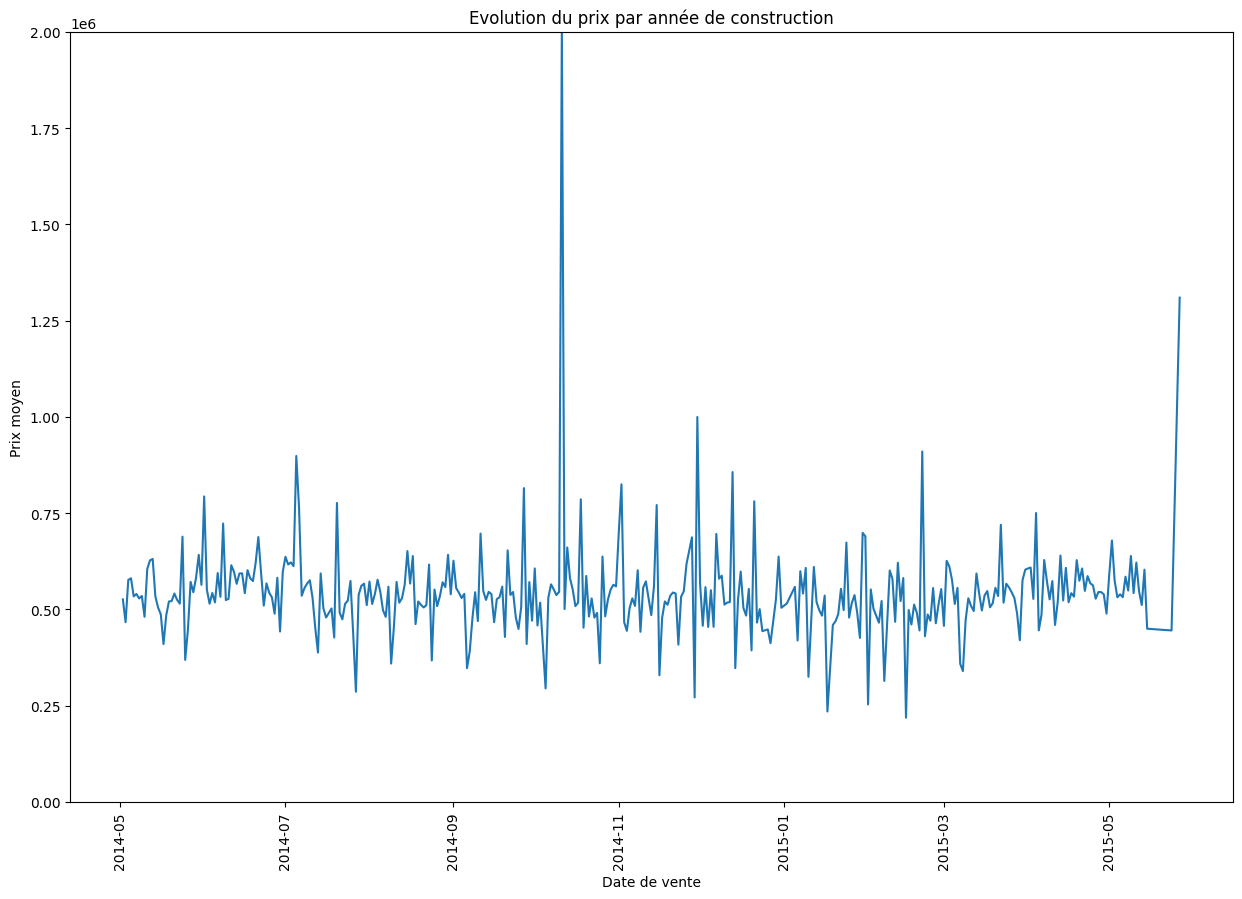

In [203]:
# Convertir la colonne date en format datetime
df['date'] = pd.to_datetime(df['date'])

# Calculer le prix moyen par date
df = df.groupby(['date']).mean()
# graphique pour l'evolution du prix par année moyenne des maisons
plt.figure(figsize=(15, 10))
sns.lineplot(x='date', y='price', data=df)
plt.title('Evolution du prix par année de construction')
plt.xlabel('Date de vente')
plt.ylabel('Prix moyen')
plt.ylim(0, 2000000)
plt.xticks(rotation=90)
plt.show()

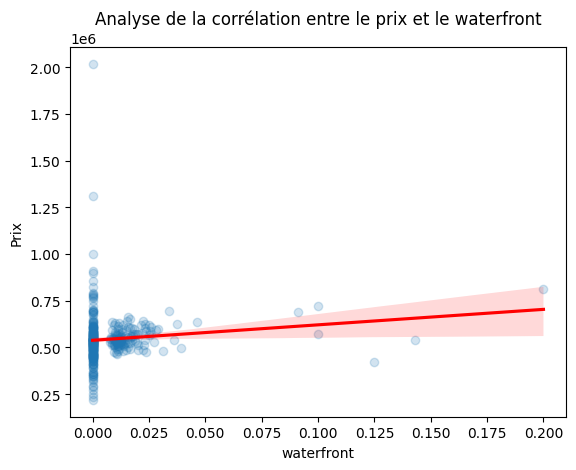

In [204]:
# prix et waterfront correlation
df[['price', 'waterfront']].corr()
# graphique
sns.regplot(x='waterfront', y='price', data=df, scatter_kws={'alpha': 0.2} , line_kws={'color': 'red'})
plt.title('Analyse de la corrélation entre le prix et le waterfront')
plt.ylabel('Prix')
plt.show()

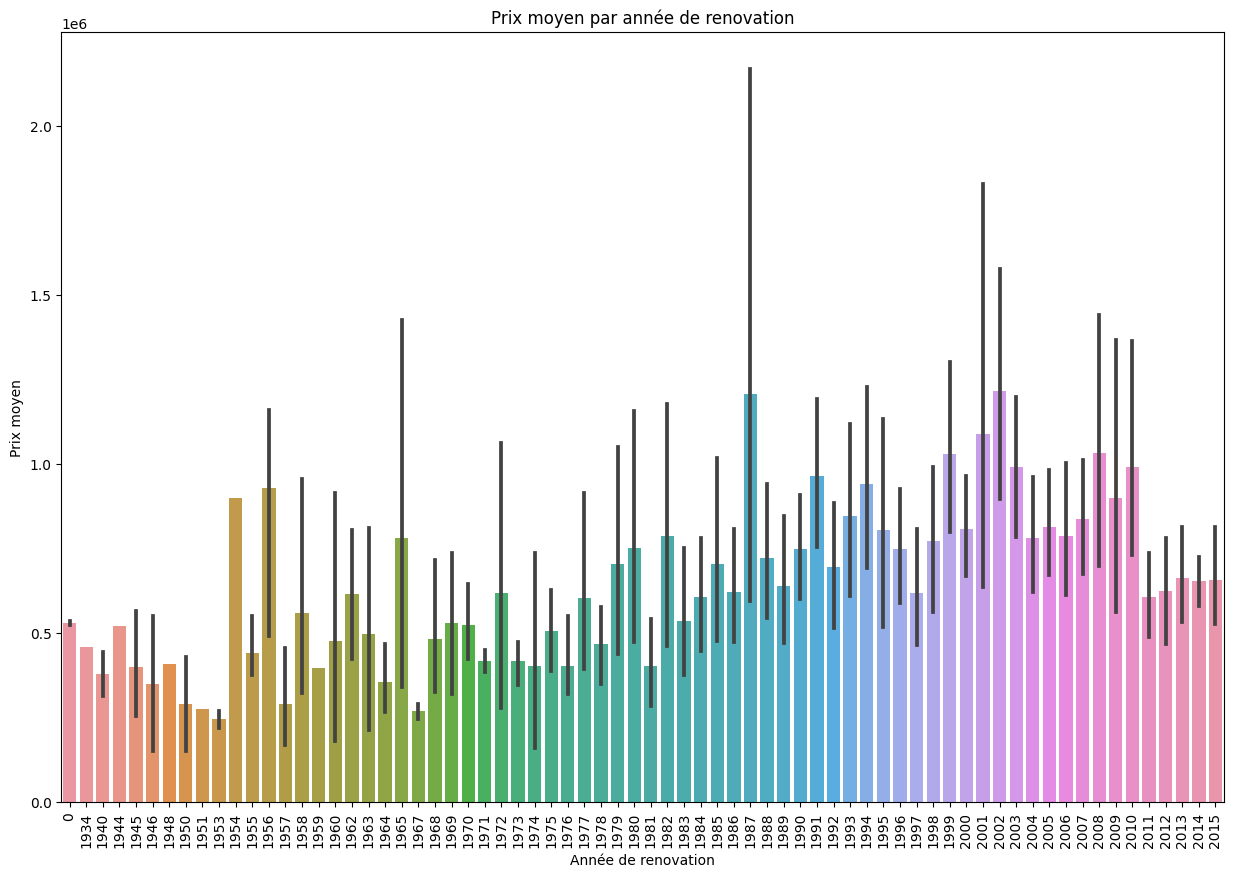

In [213]:
# prix par renovation
plt.figure(figsize=(15, 10))
sns.barplot(x='yr_renovated', y='price', data=df)
plt.title('Prix moyen par année de renovation')
plt.xlabel('Année de renovation')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.show()



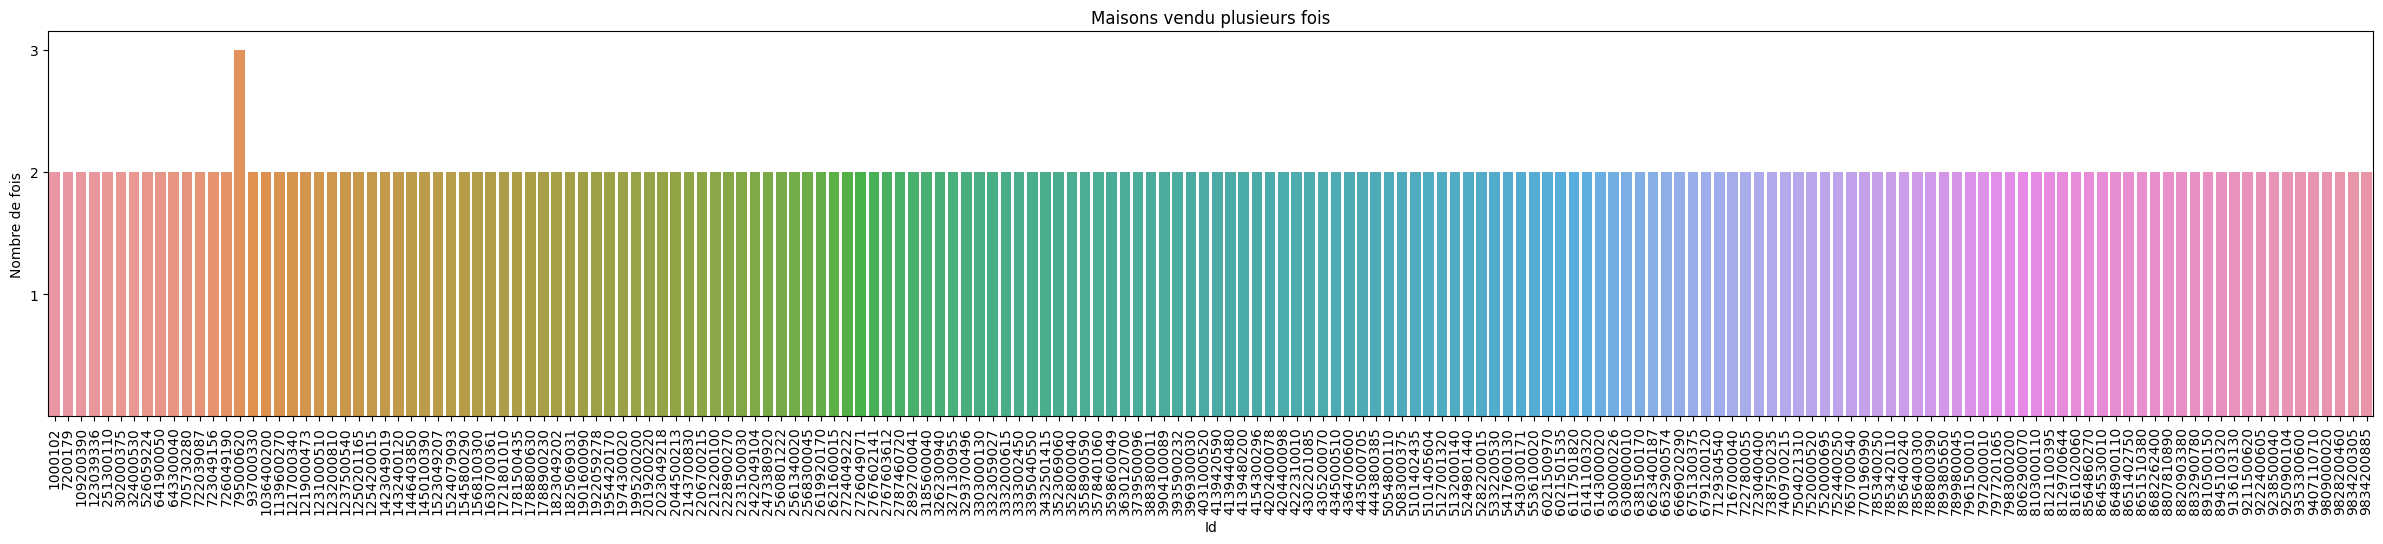

In [208]:
# trouve moi si il a des maisons qui ont été vendu plusieurs fois
df = pd.read_csv('data/kc_house_data.csv')
df_filtre = df.groupby('id').filter(lambda x: len(x) > 1)
df_filtre
# graphique pour voir les maisons qui été vendu plusieurs fois
plt.figure(figsize=(30, 5))
sns.countplot(x='id', data=df_filtre)
plt.title('Maisons vendu plusieurs fois')
plt.xlabel('Id')
plt.ylabel('Nombre de fois')
plt.xticks(rotation=90)
plt.yticks([1, 2, 3])
plt.show()



In [209]:
# Création de la carte
map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Ajout des points sur la carte
for i in range(0 , 3000):
    if df.iloc[i]['price'] < 300000:
        color = 'green'
    elif df.iloc[i]['price'] < 500000:
        color = 'black'
    elif df.iloc[i]['price'] < 1000000:
        color = 'blue'
    elif df.iloc[i]['price'] < 1500000:
        color = 'orange'
    elif df.iloc[i]['price'] < 2000000:
        color = 'yellow'
    else:
        color = 'red'
    
    # Ajout d'un marqueur pour chaque point
    folium.Marker(location=[df.iloc[i]['lat'], df.iloc[i]['long']], 
                  popup=f"Price: {df.iloc[i]['price']}$", 
                  icon=folium.Icon(color=color)).add_to(map)

# Ajout d'une légende
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 200px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;">
     &nbsp; Price &nbsp; <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:green"></i> < 300K <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:black"></i> 300K - 500K <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:blue"></i> 500K - 1M <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:orange"></i> 1M - 1.5M <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:yellow"></i> 1.5M - 2M <br>
     &nbsp; &nbsp; <i class="fa fa-circle" style="color:red"></i> > 2M <br>
      </div>
     '''
map.get_root().html.add_child(folium.Element(legend_html))

# Sauvegarde de la carte en HTML
map.save('map.html')


/tmp/ipykernel_14944/2049613596.py:22: UserWarning: color argument of Icon should be one of: {'beige', 'black', 'purple', 'orange', 'darkgreen', 'blue', 'cadetblue', 'lightblue', 'darkblue', 'green', 'darkred', 'lightgray', 'lightred', 'darkpurple', 'lightgreen', 'red', 'gray', 'white', 'pink'}.
  icon=folium.Icon(color=color)).add_to(map)


3. Enlève les valeurs aberrantes ou données non nécessaires

In [210]:
df = df[df['bedrooms'] != 33]
df.value_counts('bedrooms')
df = df[df['bathrooms'] != 0]



### 4.Enregistre le dataframe nettoyé

In [211]:
df.rename(columns={'sqft_living': 'surface'}, inplace=True)
df.to_csv('data/kc_house_data_clean.csv', index=False)
df

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
